In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:\\Users\\Travis\\OneDrive\\Data Science\\Personal_Projects\\Sports\\NBA_Prediction_V3_1')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv('data/team/All_Things_9.csv', low_memory=False)

In [3]:
col_list = df.columns.to_list()
col_list

['Unnamed: 0.4',
 'Unnamed: 0.3',
 'Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'trad_team',
 'trad_matchup',
 'trad_gamedate',
 'trad_w/l',
 'trad_min',
 'trad_pts',
 'trad_fgm',
 'trad_fga',
 'trad_fg%',
 'trad_3pm',
 'trad_3pa',
 'trad_3p%',
 'trad_ftm',
 'trad_fta',
 'trad_ft%',
 'trad_oreb',
 'trad_dreb',
 'trad_reb',
 'trad_ast',
 'trad_tov',
 'trad_stl',
 'trad_blk',
 'trad_pf',
 'trad_+/-',
 'trad_season',
 'trad_season_type',
 'adv_team',
 'adv_matchup',
 'adv_gamedate',
 'adv_w/l',
 'adv_min',
 'adv_offrtg',
 'adv_defrtg',
 'adv_netrtg',
 'adv_ast%',
 'adv_ast/to',
 'adv_astratio',
 'adv_oreb%',
 'adv_dreb%',
 'adv_reb%',
 'adv_tov%',
 'adv_efg%',
 'adv_ts%',
 'adv_pace',
 'adv_pie',
 'adv_season',
 'adv_season_type',
 'four_team',
 'four_matchup',
 'four_gamedate',
 'four_w/l',
 'four_min',
 'four_efg%',
 'four_ftarate',
 'four_tov%',
 'four_oreb%',
 'four_oppefg%',
 'four_oppfta\xa0rate',
 'four_opptov%',
 'four_opporeb%',
 'four_season',
 'four_season_type',
 'misc_tea

In [4]:
# get rid of unnamed cols
unnamed = df.columns[df.columns.str.contains('Unnamed')]
unnamed
df = df.drop(unnamed, axis=1)

In [5]:
# convert 'even' to 0
df['MONEYLINE'] = df['MONEYLINE'].replace('even', 0)

In [6]:
df.DATASET = df.DATASET.astype(str)
df['GAME-ID'] = df['GAME-ID'].astype(str)
df['TEAM'] = df['TEAM'].astype(str)
df['VENUE'] = df['VENUE'].astype(str)
df['TEAM\nREST DAYS'] = df['TEAM\nREST DAYS'].astype(str)
df['STARTING LINEUPS'] = df['STARTING LINEUPS'].astype(str)
df['MAIN REF'] = df['MAIN REF'].astype(str)
df['CREW'] = df['CREW'].astype(str)
df['OPENING SPREAD'] = df['OPENING SPREAD'].astype(np.float64)
df['OPENING TOTAL'] = df['OPENING TOTAL'].astype(np.float64)
df['CLOSING SPREAD'] = df['CLOSING SPREAD'].astype(np.float64)
df['MONEYLINE'] = df['MONEYLINE'].astype(np.float64)


In [7]:
df.shape

(22824, 834)

In [8]:
df = df.dropna(subset=['t1_running_trad_min'])
df = df.dropna(subset=['t2_running_trad_min'])

In [9]:
# TODO: NOT THIS
df = df.fillna(0)

In [10]:
# find columns starting with league_running
league_running = df.columns[df.columns.str.contains('league_running')]
df = df.drop(league_running, axis=1)

In [11]:
col_check = pd.DataFrame(df.columns)
col_check

,0
0,trad_team
1,trad_matchup
2,trad_gamedate
3,trad_w/l
4,trad_min
...,...
768,CREW CHIEF
769,REFEREE\n&\nUMPIRE
770,FULL GAME\nODDS URL
771,opponent


In [12]:
keep1 = ['trad_team', 'trad_matchup', 'trad_gamedate', 'trad_season', 'team_2']
keep4 = list(col_check[0][220:])
keep_all = keep1+ keep4

In [13]:
if 'who_wins' in keep_all:
    keep_all.remove('who_wins')
if 't1_t2_blk' in keep_all:
    keep_all.remove('t1_t2_blk')
if 't1_t2_stl' in keep_all:
    keep_all.remove('t1_t2_stl')
if 't1_t2_pf' in keep_all:
    keep_all.remove('t1_t2_pf')
if 't1_t2_pts' in keep_all:
    keep_all.remove('t1_t2_pts')
if 't1_t2_tov' in keep_all:
    keep_all.remove('t1_t2_tov')
if 't1_t2_ast' in keep_all:
    keep_all.remove('t1_t2_ast')
keep_all

['trad_team',
 'trad_matchup',
 'trad_gamedate',
 'trad_season',
 'team_2',
 't1_running_trad_min',
 't1_running_trad_pts',
 't1_running_trad_fgm',
 't1_running_trad_fga',
 't1_running_trad_fg%',
 't1_running_trad_3pm',
 't1_running_trad_3pa',
 't1_running_trad_3p%',
 't1_running_trad_ftm',
 't1_running_trad_fta',
 't1_running_trad_ft%',
 't1_running_trad_oreb',
 't1_running_trad_dreb',
 't1_running_trad_reb',
 't1_running_trad_ast',
 't1_running_trad_tov',
 't1_running_trad_stl',
 't1_running_trad_blk',
 't1_running_trad_pf',
 't1_running_trad_+/-',
 't1_running_adv_min',
 't1_running_adv_offrtg',
 't1_running_adv_defrtg',
 't1_running_adv_netrtg',
 't1_running_adv_ast%',
 't1_running_adv_ast/to',
 't1_running_adv_astratio',
 't1_running_adv_oreb%',
 't1_running_adv_dreb%',
 't1_running_adv_reb%',
 't1_running_adv_tov%',
 't1_running_adv_efg%',
 't1_running_adv_ts%',
 't1_running_adv_pace',
 't1_running_adv_pie',
 't1_running_four_min',
 't1_running_four_efg%',
 't1_running_four_ftara

In [14]:
df = df[keep_all]

In [15]:
# Drop all "minutes" columns (or min)
for col in df.columns:
    if col.endswith('min'):
        df = df.drop(col, axis=1)

In [16]:
matchup_gamedate = df['Matchup_GameDate']

In [17]:
df['home?'] = np.where(df['home_or_away'] == 'home', 1, 0)

In [18]:
# drop unneeded columns
not_needed = ['trad_team', 'team_2', 'trad_gamedate_mdy',  'Matchup_GameDate', 'trad_gamedate', 
                'date_x',  'DATASET', 'GAME-ID','Nba_com_team_Abbrev','Nba_com_team_Abbrev.1',
                'DATE',  'STARTING LINEUPS',  'MAIN REF', 'CREW',  'CREW CHIEF', 'Date_underscore',
                'REFEREE\n&\nUMPIRE','FULL GAME\nODDS URL',  'date_y', 'date_x',  'LINE \nMOVEMENT #1', 
                'LINE \nMOVEMENT #2', 'LINE \nMOVEMENT #3', 'trad_matchup',  'Opp_abbrev', 'HomeTeam',
                'AwayTeam','opponent', 'TEAM', 'VENUE', 'Team_Abrev', 'OPENING ODDS', 'CLOSING\nODDS', 
                'TEAM\nREST DAYS', 'home_or_away']

df = df.drop(not_needed, axis=1)

In [19]:
df.shape

(22472, 495)

In [20]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# Scoring Metric
class_metric = 'accuracy'

In [21]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

[]

In [22]:
X.columns

Index(['trad_season', 't1_running_trad_pts', 't1_running_trad_fgm',
       't1_running_trad_fga', 't1_running_trad_fg%', 't1_running_trad_3pm',
       't1_running_trad_3pa', 't1_running_trad_3p%', 't1_running_trad_ftm',
       't1_running_trad_fta',
       ...
       'Estimate_Points_Difference_20gm', 'Tm1_Points_Estimate_Weighted',
       'Tm2_Points_Estimate_Weighted', 'Estimate_Points_Difference_Weighted',
       'OPENING SPREAD', 'OPENING TOTAL', 'CLOSING SPREAD', 'CLOSING TOTAL',
       'MONEYLINE', 'home?'],
      dtype='object', length=494)

In [23]:
numerical_columns

['trad_season',
 't1_running_trad_pts',
 't1_running_trad_fgm',
 't1_running_trad_fga',
 't1_running_trad_fg%',
 't1_running_trad_3pm',
 't1_running_trad_3pa',
 't1_running_trad_3p%',
 't1_running_trad_ftm',
 't1_running_trad_fta',
 't1_running_trad_ft%',
 't1_running_trad_oreb',
 't1_running_trad_dreb',
 't1_running_trad_reb',
 't1_running_trad_ast',
 't1_running_trad_tov',
 't1_running_trad_stl',
 't1_running_trad_blk',
 't1_running_trad_pf',
 't1_running_trad_+/-',
 't1_running_adv_offrtg',
 't1_running_adv_defrtg',
 't1_running_adv_netrtg',
 't1_running_adv_ast%',
 't1_running_adv_ast/to',
 't1_running_adv_astratio',
 't1_running_adv_oreb%',
 't1_running_adv_dreb%',
 't1_running_adv_reb%',
 't1_running_adv_tov%',
 't1_running_adv_efg%',
 't1_running_adv_ts%',
 't1_running_adv_pace',
 't1_running_adv_pie',
 't1_running_four_efg%',
 't1_running_four_ftarate',
 't1_running_four_tov%',
 't1_running_four_oreb%',
 't1_running_four_oppefg%',
 't1_running_four_oppfta\xa0rate',
 't1_running

In [24]:
col_list = X.columns.to_list()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[]

In [27]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [28]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [29]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

In [30]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [])])

In [31]:
dfcols = ['Model', 'RWF Score', 'F1',  'Recall',  'Precision',  'Accuracy']
model_summary = pd.DataFrame(columns=dfcols)
model_summary

,Model,RWF Score,F1,Recall,Precision,Accuracy


In [32]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            a = cf[0,0]
            b = cf[0,1]
            c = cf[1,0]
            d = cf[1,1]
            tn = ((a / (a+b))*100).round(2).astype(str) + '%'
            fp = ((b / (a+b))*100).round(2).astype(str) + '%'
            fn = ((c / (c+d))*100).round(2).astype(str) + '%'
            tp = ((d / (c+d))*100).round(2).astype(str) + '%'
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = (1+(2**2)) * ((precision * recall) / (((2**2) * precision) + recall))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\n\nRecall-Weighted F Score={:0.3f}".format(
                accuracy,precision,recall,f1_score, rwf_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages =  [tn,fp,fn,tp]
        # old = group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label', weight = 'bold')
        plt.xlabel('Predicted label' + stats_text, weight = 'bold')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title,size = 20, weight = 'bold')

In [33]:
# Define Result Saving Initial Function
def save_result_w_matrix(cf,cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary
            accuracy  = np.trace(cf) / float(np.sum(cf))
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            f_beta = (1+(.5**2)) * ((precision * recall) / (((.5**2) * precision) + recall))
            row = [(model_name, f_beta, f1_score, recall, precision, accuracy, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols, data = row)
            yeep = [model_summary, res]
            model_summary = pd.concat(yeep)
            model_summary = model_summary.sort_values('Accuracy', ascending = False)
            model_summary = model_summary.drop_duplicates()
            return model_summary.round(3)

In [34]:
dfcols2 = ['Model', 'Accuracy']

In [35]:
def save_result(accuracy, model_name):
            global model_summary2
            row = [(model_name, accuracy)]
            res = pd.DataFrame(columns = dfcols2, data = row)
            yeep = [model_summary2, res]
            model_summary2 = pd.concat(yeep)
            model_summary2 = model_summary2.sort_values('Accuracy', ascending = False)
            model_summary2 = model_summary2.drop_duplicates()
            return model_summary2.round(3)

In [36]:

# Function runs model, fits it, and saves the results
def run_model(model, model_name):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_prediction)
    save_result(cf_matrix, model_name)
    cf = make_confusion_matrix(cf_matrix)
    return model_summary
dfcols2 = ['Model', 'Cv_Mean_Accuracy', 'Cv_Std']
model_summary2 = pd.DataFrame(columns=dfcols2)
model_summary2

,Model,Cv_Mean_Accuracy,Cv_Std


In [37]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

                          # 1. Confusion Matrix
# SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [38]:
def make_cf(model):
    #load pickle file
    with open(model, 'rb') as f:
        model = pickle.load(f)
    #get predictions
    y_pred = model.predict(X_test)
    cf = plot_confusion_matrix(model, y_test, y_pred)
    return cf

In [39]:
# Function creates a pipeline, runs it, saves the result, and saves a pickle file

def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(f'pickle_models/{model_name}.pkl', 'wb'))
    return res

In [40]:
pipe_1 = Pipeline(steps=[('preprocess', preprocessing), ('model', RandomForestClassifier())])
pipe_1.fit(X_train, y_train)
preds = pipe_1.predict(X_test)
cf = confusion_matrix(y_test, preds)


In [41]:
cf

array([[2331,  490],
       [ 515, 2282]], dtype=int64)

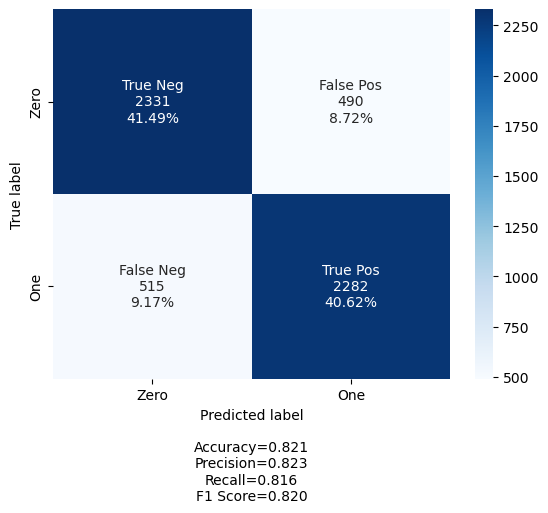

In [42]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [43]:
# save pickle to file
pickle.dump(pipe_1, open('pickle_models/pipe_1.pkl', 'wb'))

In [44]:
cat_list= list(feature_names_categorical)
all_cats = cat_list + numerical_columns
f_imp = pipe_1.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

,Importance
CLOSING SPREAD,0.017
MONEYLINE,0.017
OPENING SPREAD,0.011
running_t1-t2_adv_pie,0.008
Estimate_Points_Difference_40gm,0.007
...,...
top_8_predicted_winner,0.000
team2_prev_season_champ_winner,0.000
prev_season_champ_winner,0.000
team2_rest_days,0.000


In [45]:
f_imp_df[:50]

,Importance
CLOSING SPREAD,0.017
MONEYLINE,0.017
OPENING SPREAD,0.011
running_t1-t2_adv_pie,0.008
Estimate_Points_Difference_40gm,0.007
Estimate_Points_Difference_80gm,0.007
running_t1-t2_trad_+/-,0.007
t1_delta_minus_t2_delta_trad_+/-,0.006
Estimate_Points_Difference_Weighted,0.006
running_t1-t2_adv_offrtg,0.006


#### Logistic Regression

In [46]:
# Test Pipe 2

pipe2= Pipeline(steps=[('preprocess', preprocessing), ('model', LogisticRegression())])
pipe2.fit(X_train, y_train)
preds = pipe2.predict(X_test)
cf = confusion_matrix(y_test, preds)

In [47]:
cf

array([[1852,  969],
       [ 938, 1859]], dtype=int64)

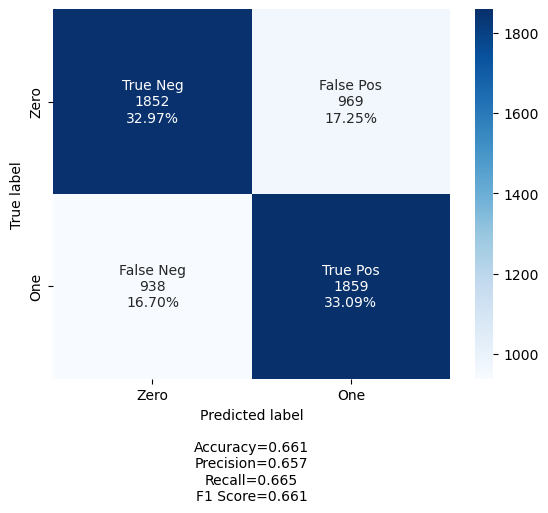

In [48]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Decision Tree

In [49]:
pipe3 = Pipeline(steps=[('preprocess', preprocessing), ('model', DecisionTreeClassifier())])
pipe3.fit(X_train, y_train)
preds = pipe3.predict(X_test)
cf = confusion_matrix(y_test, preds)
cf

array([[2161,  660],
       [ 627, 2170]], dtype=int64)

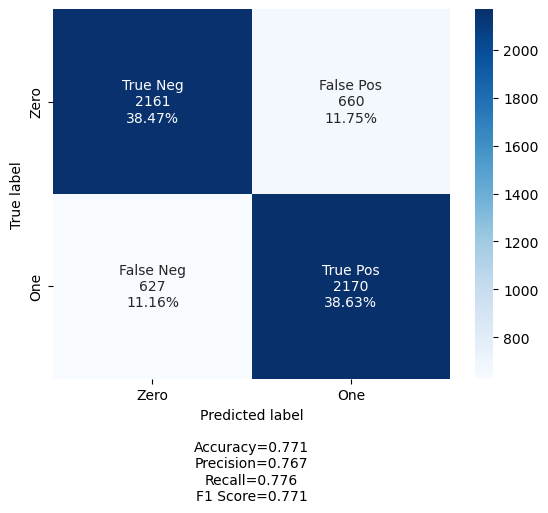

In [50]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [51]:
cat_list= list(feature_names_categorical)
all_cats = cat_list + numerical_columns
f_imp = pipe3.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

,Importance
MONEYLINE,0.091
CLOSING SPREAD,0.035
Estimate_Points_Difference_Weighted,0.022
80gm_tm2_minus_nba_std_pace,0.009
10gm_tm2_minus_nba_std_pace,0.008
...,...
prev_season_champ_winner,0.000
team2_win%_previous_season,0.000
t1_running_trad_+/-,0.000
team_win%_previous_season,0.000


#### Bagged Trees

In [52]:
pipe4 = Pipeline(steps=[('preprocess', preprocessing), ('model', BaggingClassifier())])
pipe4.fit(X_train, y_train)
preds = pipe4.predict(X_test)
cf = confusion_matrix(y_test, preds)
cf

array([[2354,  467],
       [ 651, 2146]], dtype=int64)

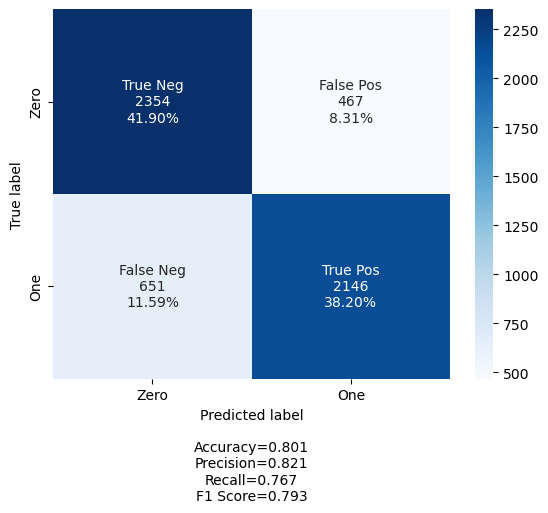

In [53]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Extra Trees

In [54]:
pipe5 = Pipeline(steps=[('preprocess', preprocessing), ('model', ExtraTreesClassifier())])
pipe5.fit(X_train, y_train)
preds = pipe5.predict(X_test)
cf = confusion_matrix(y_test, preds)
cf


array([[2309,  512],
       [ 505, 2292]], dtype=int64)

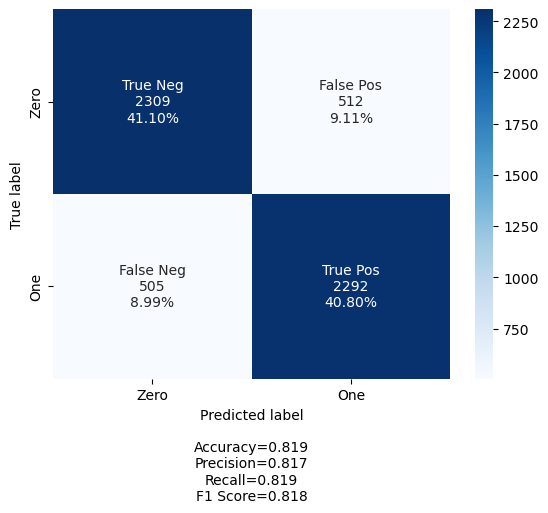

In [55]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### AdaBoost

In [56]:
import xgboost as xgb
#import adaboost
from sklearn.ensemble import AdaBoostClassifier

In [57]:
pipe6 = Pipeline(steps=[('preprocess', preprocessing), ('model', AdaBoostClassifier())])
pipe6.fit(X_train, y_train)
preds = pipe6.predict(X_test)
cf = confusion_matrix(y_test, preds)
cf

array([[1845,  976],
       [ 986, 1811]], dtype=int64)

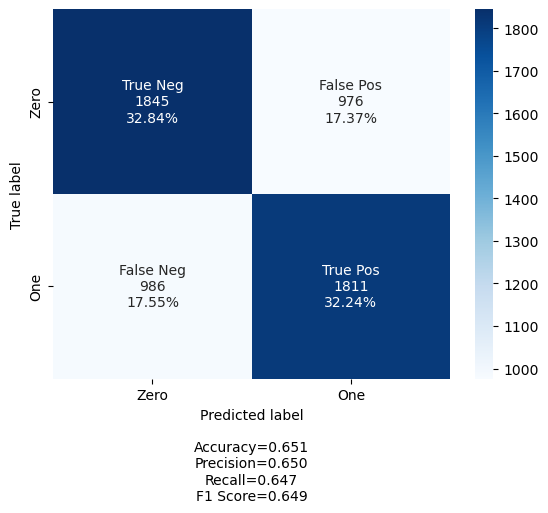

In [58]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### XGBoost

In [59]:
pipe7 = Pipeline(steps=[('preprocess', preprocessing), ('model', xgb.XGBClassifier())])
pipe7.fit(X_train, y_train)
preds = pipe7.predict(X_test)
cf = confusion_matrix(y_test, preds)
cf

[18:51:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[2253,  568],
       [ 525, 2272]], dtype=int64)

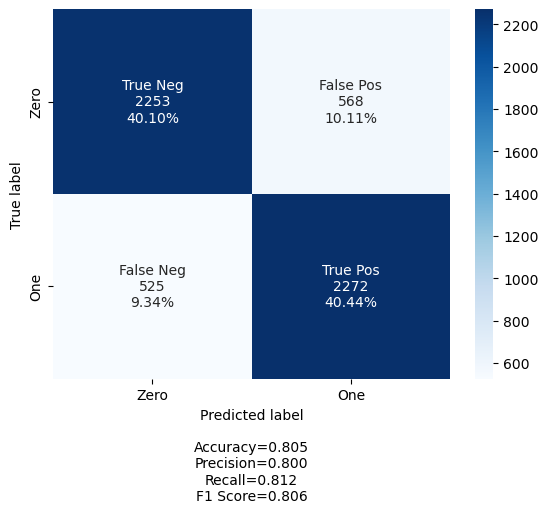

In [60]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### GridSearch Best Models

In [61]:
# do small gridsearch
params = {
    'model__n_estimators': [100, 200, 300]}

grid = GridSearchCV(pipe7, param_grid=params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

[18:52:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:10] WARNING:

{'model__n_estimators': 300}

In [62]:
grid.best_estimator_
# get best score from best_estimator_
be = grid.best_estimator_
# score be
be.score(X_test, y_test)

0.812566749733001

In [63]:
def gridsearched_model(model_best_est, model_name):
    # check the accuracy of the best_estimator
    be = model_best_est
    # score be
    be_score = be.score(X_test, y_test)
    
    res = save_result(be_score, model_name)
    # pickle model
    pickle.dump(model_best_est, open(f'pickle_models/{model_name}.pkl', 'wb'))
    # make confusion matrix
    return res

In [64]:
# get params for extra trees
pipe5.steps[1][1].get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
def extra_trees_gridsearch(model, n_jobs = 16, verbose = 10, cv = 3, scoring = 'accuracy'):

    # This grid searches each parameter, and only changes the parameter being searched. 
    # This is because I have found that grid searching multiple parameters at once can be computationally expensive,
    # without much, if any, found improvement in accuracy.


    init_grid = {'model__n_estimators' : [50, 100, 150, 200, 350, 500, 750, 1000],
                    'model__max_depth' : [None],
                    'model__max_features' : ['auto'],
                    'model__criterion' : ['gini'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}

    # grid search #1  - model__n_estimators
    gridsearch_1 = GridSearchCV(model, init_grid, cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_1.fit(X_train, y_train)
    gridsearched_model(gridsearch_1.best_estimator_, 'ET_Gridsearched_1')
    bp = gridsearch_1.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

    # get param values
    n_est = bp2[bp2['index'] == 'model__n_estimators']
    n_est = n_est[0].values[0]

    # if estimators or depth is min or max, keep pushing boundaries

    print(f'Best model__n_estimators: {n_est}')
    maxdepth_grid = {'model__n_estimators' : [n_est],
                'model__max_depth' : [None, 2,3,4,5,6,7,8,9,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 100],
                'model__max_features' : ['auto'],
                'model__criterion' : ['gini'],
                'model__min_samples_split' : [2],
                'model__min_samples_leaf' : [1],
                'model__bootstrap' :  [True],
                'model__max_leaf_nodes' : [None],
                'model__min_impurity_decrease' : [0.0],
                'model__ccp_alpha' : [0.0]}

    ##### GRID SEARCH 2 -- MAX DEPTH #####
    gridsearch_2 = GridSearchCV(model, maxdepth_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_2.fit(X_train, y_train)
    gridsearched_model(gridsearch_2.best_estimator_, 'ET_Gridsearched_2')
    bp = gridsearch_2.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__max_depth = bp2[bp2['index'] == 'model__max_depth']
    model__max_depth = model__max_depth[0].values[0]
    print(f'Best model__max_depth: {model__max_depth}')

    ##### GRID SEARCH 3 -- MAX FEATURES #####
    model__max_features_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : ['auto', 'sqrt', 'log2', .4, .5, .6, .7, .8, .9, 1.0],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [2],
                            'model__min_samples_leaf' : [1],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__ccp_alpha' : [0.0]}
    gridsearch_3 = GridSearchCV(model, model__max_features_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)

    gridsearch_3.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_3.best_estimator_, 'ET_Gridsearched_3')
    bp = gridsearch_3.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__max_features = bp2[bp2['index'] == 'model__max_features']
    model__max_features = model__max_features[0].values[0]
    print(f'Best model__max_features: {model__max_features}')

    ##### GRID SEARCH 4 -- MIN SAMPLES SPLIT #####
    model__min_samples_split_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : [model__max_features],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'model__min_samples_leaf' : [1],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__ccp_alpha' : [0.0]}

    gridsearch_4 = GridSearchCV(model, model__min_samples_split_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_4.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_4.best_estimator_, 'ET_Gridsearched_4')
    bp = gridsearch_4.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
    model__min_samples_split = model__min_samples_split[0].values[0]
    print(f'Best model__min_samples_split: {model__min_samples_split}')

    ##### GRID SEARCH 5 -- MIN SAMPLES LEAF #####
    model__min_samples_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : [model__max_features],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [model__min_samples_split],
                            'model__min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__ccp_alpha' : [0.0]}

    gridsearch_5 = GridSearchCV(model, model__min_samples_leaf_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_5.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_5.best_estimator_, 'ET_Gridsearched_5')
    bp = gridsearch_5.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
    model__min_samples_leaf = model__min_samples_leaf[0].values[0]
    print(f'Best model__min_samples_leaf: {model__min_samples_leaf}')

    ##### GRID SEARCH 6 -- MAX LEAF NODES #####
    model__max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : [model__max_features],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [model__min_samples_split],
                            'model__min_samples_leaf' : [model__min_samples_leaf],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'model__min_impurity_decrease' : [0.0],
                            'model__ccp_alpha' : [0.0]}
    gridsearch_6 = GridSearchCV(model, model__max_leaf_nodes_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_6.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_6.best_estimator_, 'ET_Gridsearched_6')
    bp = gridsearch_6.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
    model__max_leaf_nodes = model__max_leaf_nodes[0].values[0]
    print(f'Best model__max_leaf_nodes: {model__max_leaf_nodes}')

    ##### GRID SEARCH 7 -- MIN IMPURITY DECREASE #####
    model__min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : [model__max_features],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [model__min_samples_split],
                            'model__min_samples_leaf' : [model__min_samples_leaf],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [model__max_leaf_nodes],
                            'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__ccp_alpha' : [0.0]}
    gridsearch_7 = GridSearchCV(model, model__min_impurity_decrease_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_7.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_7.best_estimator_, 'ET_Gridsearched_7')
    bp = gridsearch_7.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
    model__min_impurity_decrease = model__min_impurity_decrease[0].values[0]
    print(f'Best model__min_impurity_decrease: {model__min_impurity_decrease}')

    ##### GRID SEARCH 8 -- CCP ALPHA #####
    model__ccp_alpha_grid = {'model__n_estimators' : [n_est],
                            'model__max_depth' : [model__max_depth],
                            'model__max_features' : [model__max_features],
                            'model__criterion' : ['gini'],
                            'model__min_samples_split' : [model__min_samples_split],
                            'model__min_samples_leaf' : [model__min_samples_leaf],
                            'model__bootstrap' :  [True],
                            'model__max_leaf_nodes' : [model__max_leaf_nodes],
                            'model__min_impurity_decrease' : [model__min_impurity_decrease],
                            'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
                            
    gridsearch_8 = GridSearchCV(model, model__ccp_alpha_grid,cv = cv, scoring = scoring, n_jobs = n_jobs, verbose = verbose)
    gridsearch_8.fit(X_train, y_train)
    gm = gridsearched_model(gridsearch_8.best_estimator_, 'ET_Gridsearched_8')
    bp = gridsearch_8.best_params_
    bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
    model__ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
    model__ccp_alpha = model__ccp_alpha[0].values[0]
    print(f'Best model__ccp_alpha: {model__ccp_alpha}')

    return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_

In [66]:
extra_trees = Pipeline(steps=[('preprocess', preprocessing), ('model', ExtraTreesClassifier())])

In [67]:

params = {
    'model__n_estimators': [100, 250, 500, 1000, 1500, 2000],
}

extra_trees_grid = GridSearchCV(extra_trees, params, cv=3, scoring='accuracy', n_jobs=-1, verbose=10)
extra_trees_grid.fit(X_train, y_train)
extra_trees_grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'model__n_estimators': 500}

In [68]:
mod = extra_trees_grid.best_estimator_
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2821
           1       0.82      0.81      0.82      2797

    accuracy                           0.82      5618
   macro avg       0.82      0.82      0.82      5618
weighted avg       0.82      0.82      0.82      5618



In [69]:
score = mod.score(X_test, y_test)
print(score)

0.8168387326450695


In [74]:
params = {
    'model__n_estimators': [1000, 1500],
    'model__max_depth': [None, 10, 15, 20, 25, 30, 35, 40],
    'model__max_features': ['auto', 'sqrt', 'log2', .4, .5],
}

extra_trees_grid = GridSearchCV(extra_trees, params, cv=3, scoring='accuracy', n_jobs=16, verbose=10)
extra_trees_grid.fit(X_train, y_train)
extra_trees_grid.best_params_


Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'model__max_depth': 15,
 'model__max_features': 0.5,
 'model__n_estimators': 1500}

In [75]:
extra_trees_grid.best_params_

{'model__max_depth': 15,
 'model__max_features': 0.5,
 'model__n_estimators': 1500}

In [76]:
mod = extra_trees_grid.best_estimator_
score = mod.score(X_test, y_test)
print(score)

0.8189747241011036


## Random Forest

In [79]:
random_forest = Pipeline(steps=[('preprocess', preprocessing), ('model', ExtraTreesClassifier())])

In [80]:
params = {
    'model__n_estimators': [500, 1000],
    'model__max_depth': [None, 10, 12, 15, 18, 20, 23, 25, 30, 35],
    'model__max_features': ['auto', 'sqrt', 'log2', .4, .5],
}

random_forest_grid = GridSearchCV(random_forest, params, cv=3, scoring='accuracy', n_jobs=16, verbose=10)
random_forest_grid.fit(X_train, y_train)
random_forest_grid.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'model__max_depth': 18,
 'model__max_features': 0.5,
 'model__n_estimators': 500}

In [81]:
mod = random_forest_grid.best_estimator_
score = mod.score(X_test, y_test)
print(score)

0.8244927020291919


In [ ]:
# load rf_gridsearched_3 from pickle
with open('pickle_models/rf_gridsearched_3.pkl', 'rb') as f:
    rf_gridsearched_3 = pickle.load(f)

In [84]:
cat_list= list(feature_names_categorical)
all_cats = cat_list + numerical_columns
f_imp = random_forest_grid.best_estimator_.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

,Importance
OPENING SPREAD,0.037
CLOSING SPREAD,0.020
MONEYLINE,0.017
Estimate_Points_Difference_Weighted,0.015
Estimate_Points_Difference_40gm,0.012
...,...
top_8_predicted_winner,0.001
team2_prev_season_champ_winner,0.001
prev_season_champ_winner,0.001
team2_rest_days,0.000


In [85]:
f_imp_df[:50]

,Importance
OPENING SPREAD,0.037
CLOSING SPREAD,0.020
MONEYLINE,0.017
Estimate_Points_Difference_Weighted,0.015
Estimate_Points_Difference_40gm,0.012
home?,0.012
Estimate_Points_Difference_80gm,0.009
Estimate_Points_Difference_20gm,0.008
t1_delta_minus_t2_delta_trad_+/-,0.007
running_t1-t2_trad_+/-,0.007


## Conclusion

The best model was the third Random Forest model, with a test accuracy of 83% (rounded). 
